In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns

In [2]:
den_shapefile = gpd.read_file('traffic_accidents_shapefile/traffic_accidents.shp')

In [3]:
den_shapefile

,OBJECTID_1,INCIDENT_I,OFFENSE_ID,OFFENSE_CO,OFFENSE__1,TOP_TRAFFI,INCIDENT_A,GEO_X,GEO_Y,GEO_LON,...,TU2_DRIVER,TU2_DRIV_1,TU2_PEDEST,SERIOUSLY_,FATALITIES,FATALITY_M,FATALITY_1,SERIOUSLY1,SERIOUSL_1,geometry
0,1.0,2017100002,201710000254410,5441,0,TRAF - ACCIDENT,I70 HWYEB / N NORTHFIELD QUEBEC ST,3167637,1708927,-104.903568,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.90357 39.77830)
1,2.0,2017100074,201710007454410,5441,0,TRAF - ACCIDENT,3200 N BRIGHTON BLVD,3145663,1704934,-104.981828,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.98183 39.76771)
2,3.0,2017100083,201710008354410,5441,0,TRAF - ACCIDENT,I70 HWYEB / I270 HWYWB,3174254,1708511,-104.880037,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.88004 39.77704)
3,4.0,2017100084,201710008454410,5441,0,TRAF - ACCIDENT,W 1ST AVENUE / N VRAIN STREET,0,0,0.000000,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,None
4,5.0,2017100117,201710011754010,5401,0,TRAF - ACCIDENT - HIT & RUN,S PLATTE RIVER DR / W TENNESSEE AVE,3142747,1679702,-104.992702,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.99270 39.69849)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110465,110466.0,20229842,2022984254410,5441,0,TRAF - ACCIDENT,19TH ST / STOUT ST,3143560,1697979,-104.989448,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,0,0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,POINT (-104.98945 39.74865)
110466,110467.0,20229868,2022986854410,5441,0,TRAF - ACCIDENT,4600 BLOCK MORRISON RD,3127352,1680475,-105.047399,...,0,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-105.04740 39.70083)
110467,110468.0,20229871,2022987154010,5401,0,TRAF - ACCIDENT - HIT & RUN,1500 BLOCK S IRVING ST,3132377,1676030,-105.029622,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,0,0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,POINT (-105.02962 39.68856)
110468,110469.0,20229912,2022991254410,5441,0,TRAF - ACCIDENT,1200 BLOCK S FEDERAL BLVD,3133726,1678329,-105.024786,...,OTHER,OTHER,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-105.02479 39.69485)


In [4]:
den_shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110470 entries, 0 to 110469
Data columns (total 43 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID_1  110470 non-null  float64 
 1   INCIDENT_I  110470 non-null  object  
 2   OFFENSE_ID  110470 non-null  object  
 3   OFFENSE_CO  110470 non-null  object  
 4   OFFENSE__1  110470 non-null  object  
 5   TOP_TRAFFI  110470 non-null  object  
 6   INCIDENT_A  110470 non-null  object  
 7   GEO_X       110470 non-null  int64   
 8   GEO_Y       110470 non-null  int64   
 9   GEO_LON     110470 non-null  float64 
 10  GEO_LAT     110470 non-null  float64 
 11  DISTRICT_I  109548 non-null  object  
 12  PRECINCT_I  104359 non-null  object  
 13  NEIGHBORHO  102657 non-null  object  
 14  BICYCLE_IN  110470 non-null  int64   
 15  PEDESTRIAN  110470 non-null  int64   
 16  HARMFUL_EV  97354 non-null   object  
 17  HARMFUL__1  19332 non-null   object  
 18  HARMFUL__2  9544

In [5]:
df = pd.read_csv('traffic_accidents.csv')
df.columns = df.columns.str.lower()
df.head()

C:\Users\Matt\AppData\Local\Temp\ipykernel_6156\497988425.py:1: DtypeWarning: Columns (11,12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('traffic_accidents.csv')


,object_id,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,reported_date,incident_address,geo_lon,...,tu2_vehicle_movement,tu2_driver_action,tu2_driver_humancontribfactor,tu2_pedestrian_action,seriously_injured,fatalities,fatality_mode_1,fatality_mode_2,seriously_injured_mode_1,seriously_injured_mode_2
0,25841,2016330220,201633022054010,5401,0,Traf - Accident - Hit & Run,2016-05-27 03:40:00.000001,2016-05-27 04:40:00.000000,I25 Hwysb / E Hampden Ave,-104.918451,...,Field Not Entered,Field Not Entered,Field Not Entered,Field Not Entered,1.0,0.0,Not Applicable,Not Applicable,Pickup Truck/Utility Van,Field Not Entered
1,25842,2016615654,201661565454410,5441,0,Traf - Accident,2016-09-25 14:14:00.000000,2016-09-25 15:32:00.000000,S Colorado Blvd / E Amherst Ave,-104.940692,...,Going Straight,Field Not Entered,No Apparent,Other,0.0,0.0,Not Applicable,Not Applicable,Other,Other
2,25843,2016800334,201680033454410,5441,0,Traf - Accident,2016-12-16 12:57:00.000000,2016-12-16 17:45:00.000000,W 8Th Ave / N Kalamath St,-105.000176,...,Going Straight,Field Not Entered,No Apparent,Other,0.0,0.0,Not Applicable,Not Applicable,Other,Other
3,25844,201663932,20166393254010,5401,0,Traf - Accident - Hit & Run,2016-01-30 16:07:00.000000,2016-01-30 16:47:00.000000,N Federal Blvd / W 14Th Ave,-105.025152,...,Going Straight,Other,No Apparent,Field Not Entered,0.0,0.0,Not Applicable,Not Applicable,Field Not Entered,Field Not Entered
4,25845,201615309,20161530954410,5441,0,Traf - Accident,2016-01-08 10:12:00.000001,2016-01-08 11:01:00.000000,Block S Bonnie Brae Blvd,-104.956030,...,Field Not Entered,Field Not Entered,Field Not Entered,Field Not Entered,0.0,0.0,Not Applicable,Not Applicable,Field Not Entered,Field Not Entered


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218322 entries, 0 to 218321
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   object_id                      218322 non-null  int64  
 1   incident_id                    218322 non-null  int64  
 2   offense_id                     218322 non-null  int64  
 3   offense_code                   218322 non-null  int64  
 4   offense_code_extension         218322 non-null  int64  
 5   top_traffic_accident_offense   218322 non-null  object 
 6   first_occurrence_date          218322 non-null  object 
 7   reported_date                  218322 non-null  object 
 8   incident_address               218322 non-null  object 
 9   geo_lon                        218322 non-null  float64
 10  geo_lat                        218322 non-null  float64
 11  district_id                    218322 non-null  object 
 12  precinct_id                   

In [7]:
df['first_occurrence_date'] = pd.to_datetime(df['first_occurrence_date'])
df['date_occ'] = df['first_occurrence_date'].dt.date
df.drop('first_occurrence_date', axis=1, inplace=True)
df.head()

,object_id,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,reported_date,incident_address,geo_lon,geo_lat,...,tu2_driver_action,tu2_driver_humancontribfactor,tu2_pedestrian_action,seriously_injured,fatalities,fatality_mode_1,fatality_mode_2,seriously_injured_mode_1,seriously_injured_mode_2,date_occ
0,25841,2016330220,201633022054010,5401,0,Traf - Accident - Hit & Run,2016-05-27 04:40:00.000000,I25 Hwysb / E Hampden Ave,-104.918451,39.653080,...,Field Not Entered,Field Not Entered,Field Not Entered,1.0,0.0,Not Applicable,Not Applicable,Pickup Truck/Utility Van,Field Not Entered,2016-05-27
1,25842,2016615654,201661565454410,5441,0,Traf - Accident,2016-09-25 15:32:00.000000,S Colorado Blvd / E Amherst Ave,-104.940692,39.665498,...,Field Not Entered,No Apparent,Other,0.0,0.0,Not Applicable,Not Applicable,Other,Other,2016-09-25
2,25843,2016800334,201680033454410,5441,0,Traf - Accident,2016-12-16 17:45:00.000000,W 8Th Ave / N Kalamath St,-105.000176,39.728924,...,Field Not Entered,No Apparent,Other,0.0,0.0,Not Applicable,Not Applicable,Other,Other,2016-12-16
3,25844,201663932,20166393254010,5401,0,Traf - Accident - Hit & Run,2016-01-30 16:47:00.000000,N Federal Blvd / W 14Th Ave,-105.025152,39.738005,...,Other,No Apparent,Field Not Entered,0.0,0.0,Not Applicable,Not Applicable,Field Not Entered,Field Not Entered,2016-01-30
4,25845,201615309,20161530954410,5441,0,Traf - Accident,2016-01-08 11:01:00.000000,Block S Bonnie Brae Blvd,-104.956030,39.702121,...,Field Not Entered,Field Not Entered,Field Not Entered,0.0,0.0,Not Applicable,Not Applicable,Field Not Entered,Field Not Entered,2016-01-08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218322 entries, 0 to 218321
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   object_id                      218322 non-null  int64  
 1   incident_id                    218322 non-null  int64  
 2   offense_id                     218322 non-null  int64  
 3   offense_code                   218322 non-null  int64  
 4   offense_code_extension         218322 non-null  int64  
 5   top_traffic_accident_offense   218322 non-null  object 
 6   reported_date                  218322 non-null  object 
 7   incident_address               218322 non-null  object 
 8   geo_lon                        218322 non-null  float64
 9   geo_lat                        218322 non-null  float64
 10  district_id                    218322 non-null  object 
 11  precinct_id                    218322 non-null  object 
 12  neighborhood_id               

In [9]:
df['date_occ'] = pd.to_datetime(df['date_occ'])
monthly_acc_counts = df.groupby(pd.Grouper(key='date_occ', freq='M')).size().reset_index(name='count')
monthly_acc_counts

,date_occ,count
0,2013-01-31,1793
1,2013-02-28,1504
2,2013-03-31,1610
3,2013-04-30,1651
4,2013-05-31,1662
...,...,...
119,2022-12-31,1365
120,2023-01-31,1400
121,2023-02-28,1367
122,2023-03-31,1404


In [10]:
monthly_average = monthly_acc_counts['count'].mean()
monthly_average

1760.6612903225807

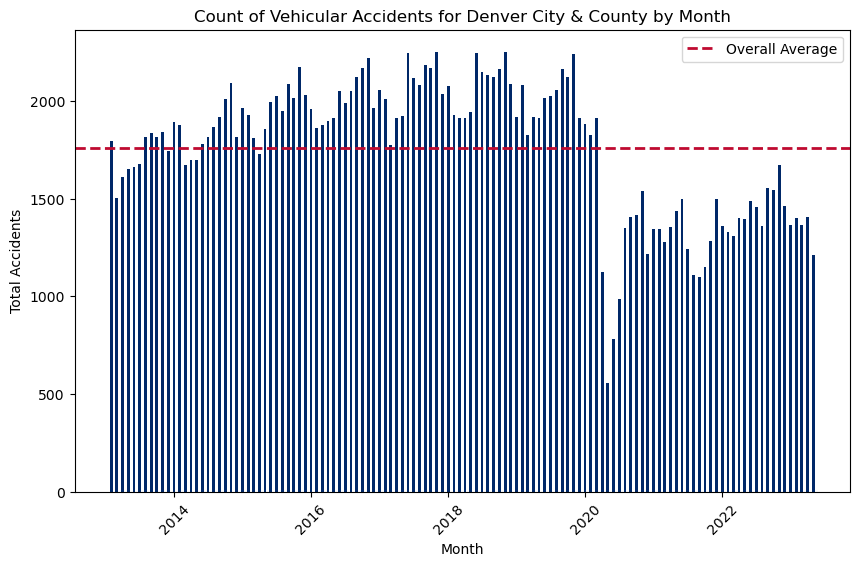

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_acc_counts['date_occ'], monthly_acc_counts['count'], color=('#002868'), width=15)
ax.axhline(y=monthly_average, color='#BF0A30', linestyle='--', linewidth=2, label='Overall Average')
ax.set_xlabel('Month')
ax.set_ylabel('Total Accidents')
ax.set_title('Count of Vehicular Accidents for Denver City & County by Month')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
bicycle_accidents_shape = den_shapefile[(den_shapefile['BICYCLE_IN'] >= 1) & (den_shapefile['INCIDENT_A'] != 'Pending Investigation and/or Court Hearing')]
bicycle_accidents_shape.head()

,OBJECTID_1,INCIDENT_I,OFFENSE_ID,OFFENSE_CO,OFFENSE__1,TOP_TRAFFI,INCIDENT_A,GEO_X,GEO_Y,GEO_LON,...,TU2_DRIVER,TU2_DRIV_1,TU2_PEDEST,SERIOUSLY_,FATALITIES,FATALITY_M,FATALITY_1,SERIOUSLY1,SERIOUSL_1,geometry
82,83.0,2017103278,201710327854010,5401,0,TRAF - ACCIDENT - HIT & RUN,1600 BLOCK 17TH ST,3140799,1699264,-104.999242,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.99924 39.75222)
114,115.0,2017103935,201710393554410,5441,0,TRAF - ACCIDENT,W 23RD AVE / N FEDERAL BLVD,3133494,1698856,-105.025230,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-105.02523 39.75121)
332,333.0,2017113500,201711350054410,5441,0,TRAF - ACCIDENT,W 17TH AVE / N KING ST,3131303,1696199,-105.033070,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-105.03307 39.74394)
346,347.0,2017114067,201711406754410,5441,0,TRAF - ACCIDENT,S HAVANA ST / E CORNELL AVE,3178447,1668643,-104.866109,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-104.86611 39.66751)
444,445.0,2017119770,201711977054410,5441,0,TRAF - ACCIDENT,W 23RD AVE / N BRYANT ST,3135199,1698862,-105.019166,...,00,NO APPARENT,OTHER,0,0,OTHER,OTHER,OTHER,OTHER,POINT (-105.01917 39.75120)


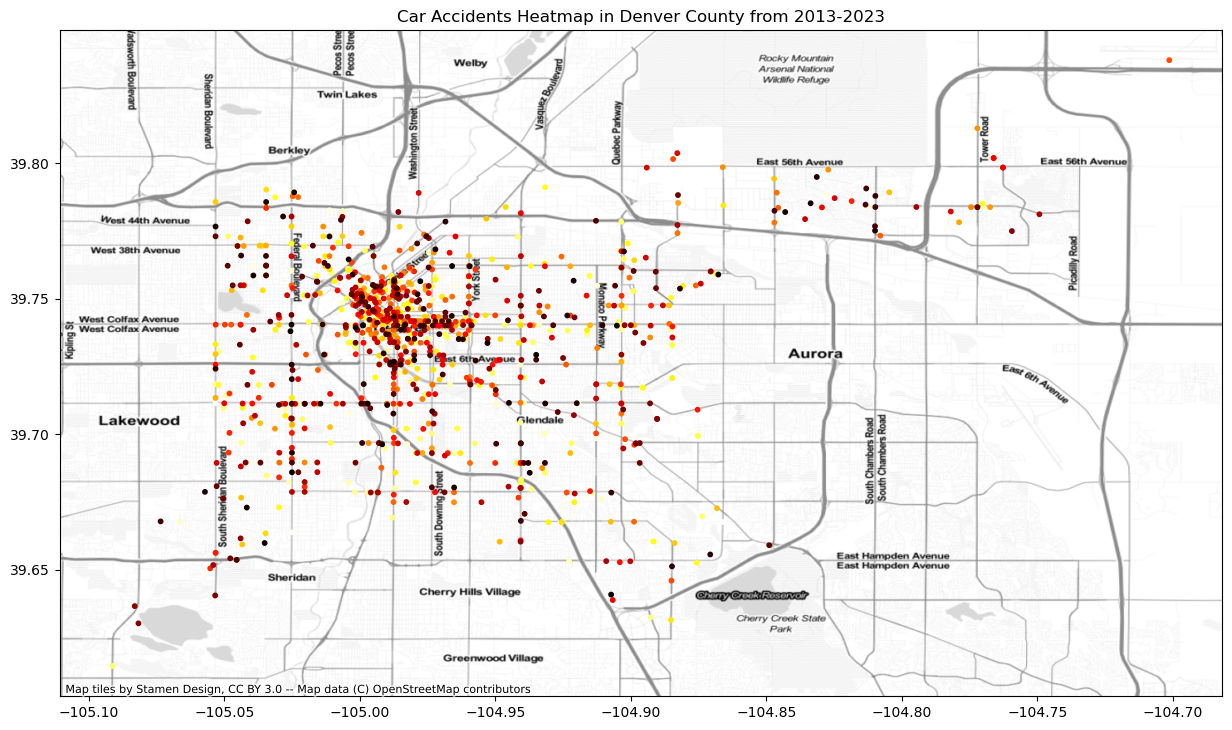

In [13]:
fig, ax = plt.subplots(figsize=(15, 12))

bicycle_accidents_shape.plot(ax=ax, cmap='hot_r', markersize=10)
ctx.add_basemap(ax, crs=den_shapefile.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
plt.title('Car Accidents Heatmap in Denver County from 2013-2023')
plt.show()

In [14]:
bicycle_accidents = df[(df['bicycle_ind'] >= 1) & (df['incident_address'] != 'Pending Investigation and/or Court Hearing')]
most_dangerous_roads = bicycle_accidents.groupby('incident_address').size().sort_values(ascending=False)
print(most_dangerous_roads.head(10))
top_10_roads = most_dangerous_roads.head(10)

incident_address
Block E 16Th Ave             18
Block 15Th St                17
Block S Colorado Blvd        13
Block E Colfax Ave           13
15Th St / Champa St          13
Block E 12Th Ave             11
E 11Th Ave / N Lincoln St    11
Block N Broadway St          11
Block E 17Th Ave             10
Block S Broadway St           9
dtype: int64


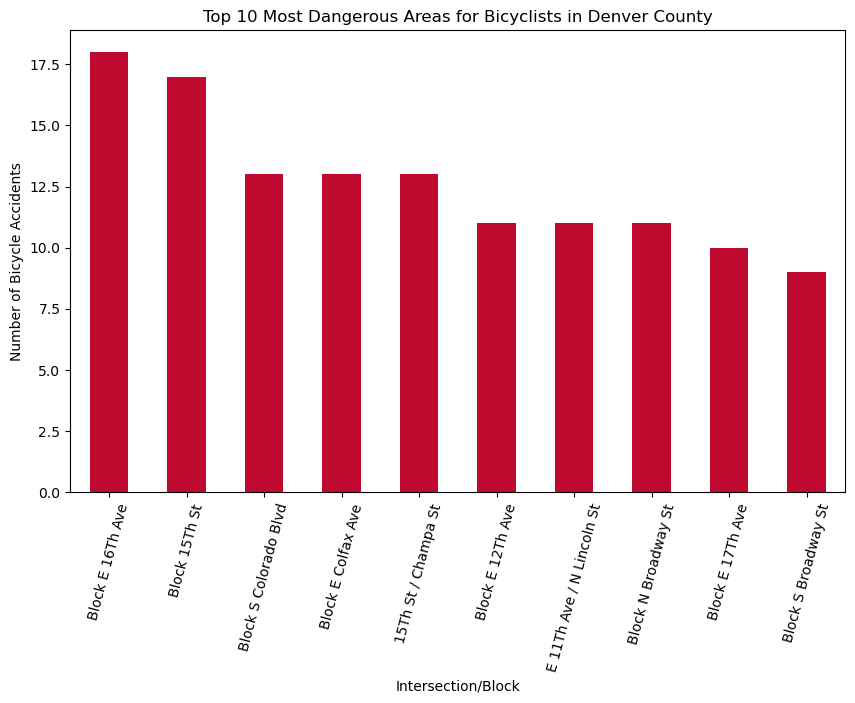

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
top_10_roads.plot(kind='bar', ax=ax, color='#BF0A30')
ax.set_xlabel('Intersection/Block')
ax.set_ylabel('Number of Bicycle Accidents')
ax.set_title('Top 10 Most Dangerous Areas for Bicyclists in Denver County')
plt.xticks(rotation=75)
plt.show()

Road just 1 block above Colfax is more dangeroud than Colfax itself.

In [16]:
bicycle_accidents.seriously_injured.unique()

array(['0.0', '2.0', '1.0', 'Field Not Entered', 0.0, 1.0, 2.0],
      dtype=object)

In [17]:
bicycle_accidents = bicycle_accidents[bicycle_accidents['fatalities'] != 'Under Investigation']
bicycle_accidents['fatalities'] = bicycle_accidents['fatalities'].astype(float)

In [18]:
bicycle_accidents['seriously_injured'] = bicycle_accidents['seriously_injured'].astype(float)

In [19]:
bicycle_accidents_serious = bicycle_accidents[(bicycle_accidents['fatalities'] >= 1) | (bicycle_accidents['seriously_injured'] >= 1)]

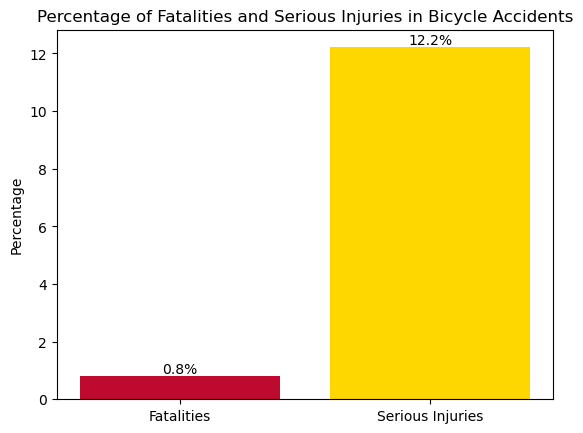

In [20]:
total_accidents = len(bicycle_accidents)

fatality_percentage = (bicycle_accidents_serious['fatalities'].sum() / total_accidents) * 100
injury_percentage = (bicycle_accidents_serious['seriously_injured'].sum() / total_accidents) * 100

labels = ['Fatalities', 'Serious Injuries']
percentages = [fatality_percentage, injury_percentage]
colors = ['#BF0A30', '#FFD700']
fig, ax = plt.subplots()
bar_plot = ax.bar(labels, percentages, color=colors)
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Fatalities and Serious Injuries in Bicycle Accidents')

for rect in bar_plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()